Average 1-star percent:  3.6%
Average 2-star percent:  4.7%
Average 3-star percent: 10.8%
Average 4-star percent: 25.2%
Average 5-star percent: 55.7%

 DescribeResult(nobs=156710, minmax=(0.0, 236.0), mean=7.055415386209438, variance=60.19398101546197, skewness=5.1574971888998675, kurtosis=63.0236544115169)
https://www.amazon.com/s?k=000100039X, score=22.4, star count=[6, 4, 8, 15, 173]
https://www.amazon.com/s?k=0002219417, score=21.2, star count=[3, 0, 6, 23, 124]
https://www.amazon.com/s?k=0002726874, score=30.0, star count=[0, 2, 2, 13, 60]
https://www.amazon.com/s?k=0006733271, score=31.0, star count=[0, 0, 1, 4, 31]
https://www.amazon.com/s?k=0007124015, score=21.8, star count=[25, 35, 53, 158, 1133]
https://www.amazon.com/s?k=0007158505, score=64.0, star count=[1, 0, 1, 4, 63]
https://www.amazon.com/s?k=0007162219, score=38.0, star count=[0, 1, 1, 10, 38]
https://www.amazon.com/s?k=0007164653, score=34.0, star count=[0, 0, 1, 6, 34]
https://www.amazon.com/s?k=0007167040, score=3

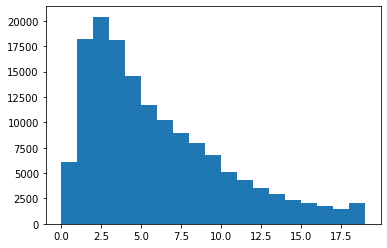

In [50]:
rec_count=0
ratings=dict()
def process(line):
    '''parse the line as a JSON record, retrieve the bits we want, and store them in the ratings dictionary'''
    import json
    review = json.loads(line)
    score = int(review['overall'])
    asin = review['asin']
    if asin not in ratings:
        thisbook = [0,0,0,0,0,0]
    else:
        thisbook = ratings[asin]

    thisbook[0]+=1 # zero slot is where we count total number of review scores
    thisbook[score]+=1   # count one more of this review score
    ratings[review['asin']]=thisbook

def madhack12_score(book):
    return (book[1]+book[5])/book[3]
    

import time
import os
import pickle
t0 = time.time()
if 0:
    dir_path = os.path.dirname(os.path.realpath(__file__))
    rev_count=0
    with open(dir_path+'./Books_5.json') as f:
        for line in f:
            process(line)
            rev_count+=1
            if rev_count%10000==0:print('+' if rev_count%100000==0 else '.',end='',flush=True)

    print("\nProcessed %i reviews for %i books in %.2f seconds"%(rev_count,len(ratings),time.time()-t0))
    t1=time.time()

    # remove books with too few reviews
    too_small = [key for key in ratings if ratings[key][0]<10]
    for k in too_small:  del ratings[k]

    store=open('./reviews_dict.p',"wb")
    pickle.dump(ratings,store)
    store.close()
    print("Stored %i books with at least 10 ratings in %.2f seconds"%(len(ratings),time.time()-t1))
else:
    store=open('./reviews_dict.p',"rb")
    ratings=pickle.load(store)
    store.close()
    #print("Retrieved %i books with at least 10 ratings in %.2f seconds"%(len(ratings),time.time()-t0))

# summarise overall results
tot_scores=[0]*6
for i in range(6): 
    tot_scores[i]=sum([ratings[key][i] for key in ratings])    
    if i>=1:
        print("Average %i-star percent: %4.1f%%"%(i,100*tot_scores[i]/tot_scores[0]))

# run the comparison
madhack_scores = [madhack12_score(ratings[key]) for key in ratings if ratings[key][3]>0] 

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.hist(madhack_scores,bins=range(0,20))
print("\n",stats.describe(madhack_scores))

t=0
for k,v in ratings.items():
    if v[3]>0 and madhack12_score(v)>20:
        print("https://www.amazon.com/s?k=%s, score=%4.1f, star count=%s"%(k,madhack12_score(v),v[1:6]))
        t+=1
        if t>20:break


Retrieved 196511 books with at least 10 ratings in 0.15 seconds
Average 1-star percent:  3.6%
Average 2-star percent:  4.7%
Average 3-star percent: 10.8%
Average 4-star percent: 25.2%
Average 5-star percent: 55.7%

 DescribeResult(nobs=156710, minmax=(0.0, 236.0), mean=7.055415386209438, variance=60.19398101546197, skewness=5.1574971888998675, kurtosis=63.0236544115169)
https://www.amazon.com/s?k=0007124015 score=21.8, star count=[25, 35, 53, 158, 1133]
https://www.amazon.com/s?k=0007386648 score=22.2, star count=[31, 48, 119, 367, 2605]
https://www.amazon.com/s?k=006052846X score=25.0, star count=[25, 3, 1, 2, 0]
https://www.amazon.com/s?k=0060544244 score=51.0, star count=[28, 5, 1, 6, 23]
https://www.amazon.com/s?k=0060775858 score=20.1, star count=[22, 10, 21, 28, 400]
https://www.amazon.com/s?k=0062071475 score=32.0, star count=[28, 2, 4, 8, 100]
https://www.amazon.com/s?k=0062089374 score=56.0, star count=[25, 2, 1, 10, 31]
https://www.amazon.com/s?k=0062292889 score=59.5, star c

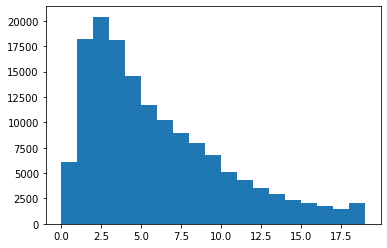

In [55]:
import time
import os
import pickle

def madhack12_score(book):
    return (book[1]+book[5])/book[3]
    
t0 = time.time()
ratings=dict()  # dictionary, keyed by book "asin" number, with value a 6-part tuple, (num_scores, 1starcount, ... ,5starcount)

store=open('./reviews_dict.p',"rb")
ratings=pickle.load(store)
store.close()
print("Retrieved %i books with at least 10 ratings in %.2f seconds"%(len(ratings),time.time()-t0))

# summarise overall results
tot_scores=[0]*6
for i in range(6): 
    tot_scores[i]=sum([ratings[key][i] for key in ratings])    
    if i>=1:
        print("Average %i-star percent: %4.1f%%"%(i,100*tot_scores[i]/tot_scores[0]))

# run the comparison: each book is keyed by Amazon's "asin"
madhack_scores = [madhack12_score(ratings[key]) for key in ratings if ratings[key][3]>0] 

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.hist(madhack_scores,bins=range(0,20))
print("\n",stats.describe(madhack_scores))

t=0
for k,v in ratings.items():
    if v[3]>0 and madhack12_score(v)>20 and v[1]>20:
        print("https://www.amazon.com/s?k=%s score=%4.1f, star count=%s"%(k,madhack12_score(v),v[1:6]))
        t+=1
        if t>20:break   #stop after first few or we'd be here forever